# Удаление помех и сохранение границ в таблицы для каждой картинки

В данной тетрадки представлено, как мы находим границу иглы, а именно проходясь по каждому контуру (линии) в картинке уже с выделенными границами находится такая линия границы, которая больше всех по размеру.

Далее проверяем правильность нашего решения для каждой картинки.

Последним шагом является сохранение границ в таблицу, где каждая отдельная таблица будет представлять из себя точки границ каждой картинки. Отдельно будем сохронять $х$ и $y$.

In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import math
import pandas as pd

Считываем все пути до картинок с белым фоном

In [2]:
list_img = pd.DataFrame(pd.read_csv(
    '..\dataset\zoom_needle_no_background.csv', sep=";"))
list_path_img = list_img["path"]
list_img

,id,sharpening,path
0,1,blunt,zoom_needle_no_background/b_needle_1.jpg
1,2,blunt,zoom_needle_no_background/b_needle_2.jpg
2,3,blunt,zoom_needle_no_background/b_needle_3.jpg
3,4,blunt,zoom_needle_no_background/b_needle_4.jpg
4,5,blunt,zoom_needle_no_background/b_needle_5.jpg
5,6,blunt,zoom_needle_no_background/b_needle_6.jpg
6,7,blunt,zoom_needle_no_background/b_needle_7.jpg
7,8,sharp,zoom_needle_no_background/s_needle_1.jpg
8,9,sharp,zoom_needle_no_background/s_needle_2.jpg
9,10,sharp,zoom_needle_no_background/s_needle_3.jpg


In [3]:
def find_contour(img):
    """
    Функция для поиска границы (контуров) алмазной иглы.
    Поиск осуществляется через два этапа. Первый, когда границы ищет метод Кэнни,
    второй, когда уже на выделенных границах метод из библиотеки openCV (findContours),
    выделяет контур на картинке, которую преобразовали на первом этапе.
    
    img - исходная картинка;
    """
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    filter_img = cv.Canny(img_gray, 100, 200)
    
    ret, thresh = cv.threshold(filter_img, 150, 255, cv.THRESH_BINARY)
    contours, hierarchy = cv.findContours(image=thresh, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_NONE)

    return contours

In [4]:
def max_points(contours):
    """
    Функция реализует поиск максимума y для одинаковых x.
    То есть проходясь по всему массиву контуров, сначала мы отбираем те контуры, 
    которые имеют, как минимум 35 пикселей. Далее соединяем все найденные границы.
    И ищем для каждого x максимальный y, так как отсчёт происходить с левого верхнего угла.
        Таким образом мы находим только нижнии точки границы.

    contours - все найденные контуры алмазной иглы.
    """
    filter_contours = [contour for contour in contours if contour.size > 50]
    contours_all = np.concatenate(filter_contours)
    contour_sort = sorted([x[0].tolist() for x in contours_all])
    x, y = contour_sort[0][0], contour_sort[0][1]
    points = []

    for point in contour_sort[1:]:
        if point[0] == x:
            if point[1] > y:
                y = point[1]
        else:
            points.append([x, y])
            x, y = point[0], point[1]

    return points

In [5]:
def draw_borders(img, conture_canny, conture_max_point):
    """
    Функция для отрисовки границ, которые выделил метод
    и отрисовки границ, которые были найдены при помощи функции max_points()

    img - исходная картинка;
    conture_canny - границы (контуры), полученные при помощи метода Кенни;
    conture_max_point - границы (контуры), полученные при помощи функции max_points();
    """
    plt.figure(figsize=(13, 13))
    image_copy_1 = img.copy()
    canny = cv.drawContours(image=image_copy_1, contours=conture_canny, contourIdx=-1, color=(0, 255, 0), thickness=2,
                            lineType=cv.LINE_AA)
    plt.subplot(121), plt.imshow(canny)
    plt.title('Границы выделенные методом Кэнни')

    image_copy_2 = img.copy()
    max_len = cv.drawContours(image=image_copy_2, contours=np.array([conture_max_point]), contourIdx=-1, color=(0, 255, 0), thickness=2,
                              lineType=cv.LINE_AA)
    plt.subplot(122), plt.imshow(max_len)
    plt.title('Отфильтрованные границы иглы')

    plt.show()

In [6]:
def draw_line_border(list_max_points):
    """
    Функция рисует границы алмазной иглы отдельно на картинке, на осях х и y
    
    list_max_points - границы (контуры), полученные при помощи функции max_points();
    """
    plt.figure(figsize=(5, 5))
    plt.plot([point[1] for point in list_max_points], color = "orange")
    plt.show

1. Запускаем поиск границ при помощи метода Кэнни и поиск наилучшей границы для каждой алмазной иглы.

2. Отрисовываем границы на плоскости

3. Реализовано сохранение точек в таблицу.

../dataset/zoom_needle_no_background/b_needle_1.jpg


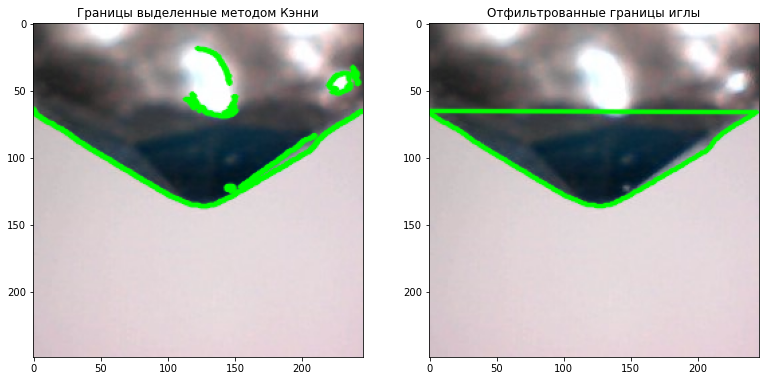

../dataset/zoom_needle_no_background/b_needle_2.jpg


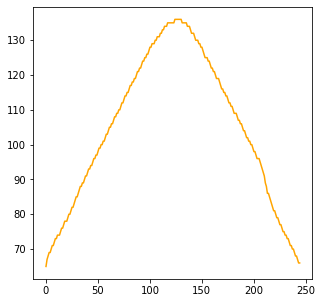

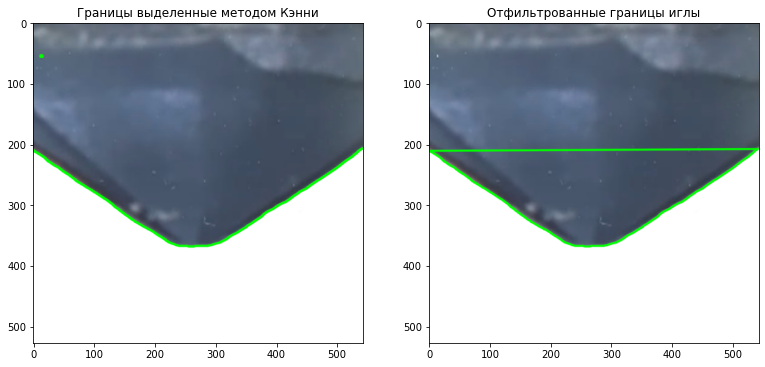

../dataset/zoom_needle_no_background/b_needle_3.jpg


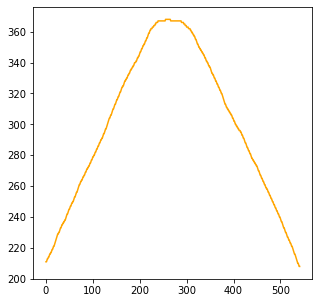

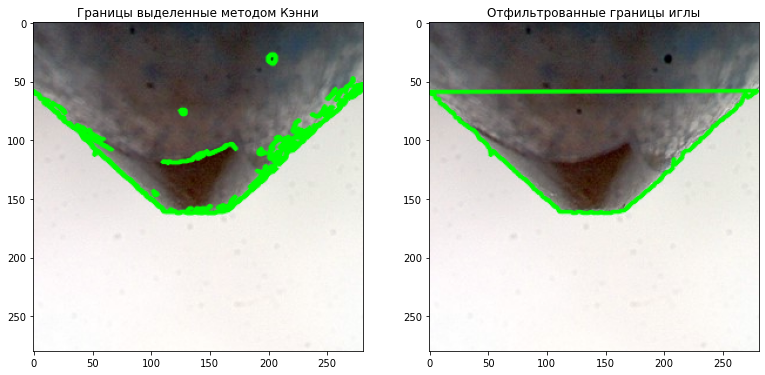

../dataset/zoom_needle_no_background/b_needle_4.jpg


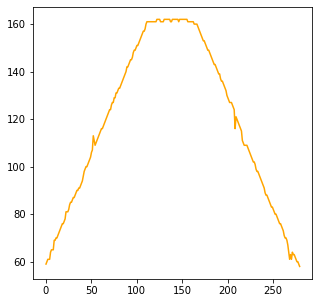

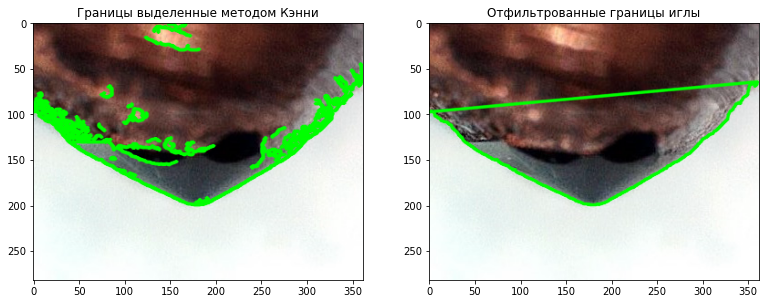

../dataset/zoom_needle_no_background/b_needle_5.jpg


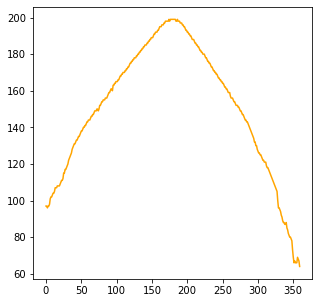

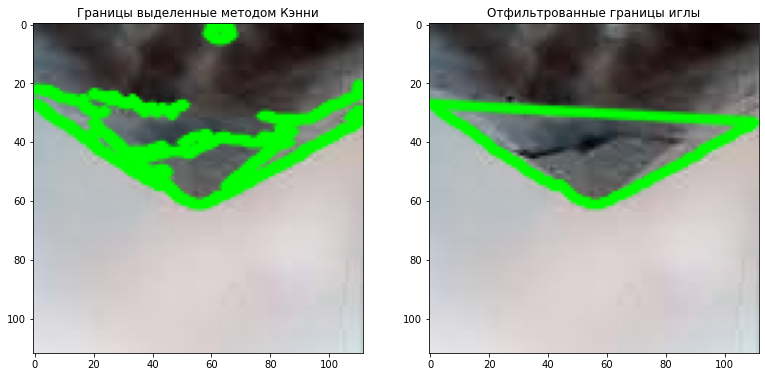

../dataset/zoom_needle_no_background/b_needle_6.jpg


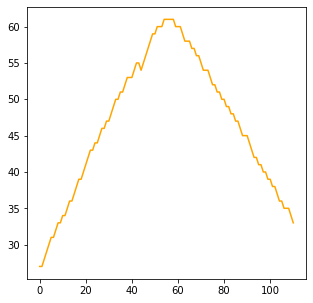

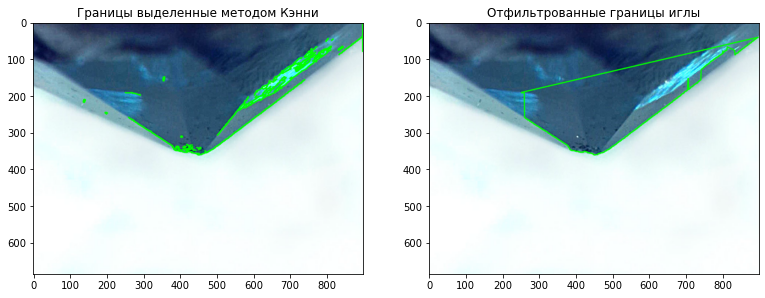

../dataset/zoom_needle_no_background/b_needle_7.jpg


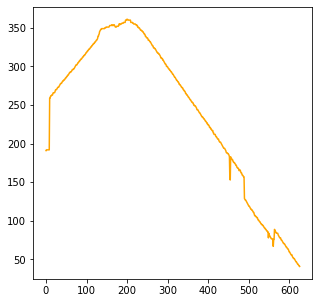

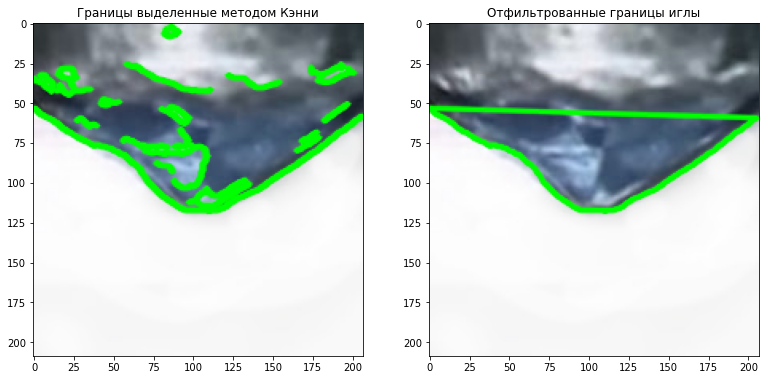

../dataset/zoom_needle_no_background/s_needle_1.jpg


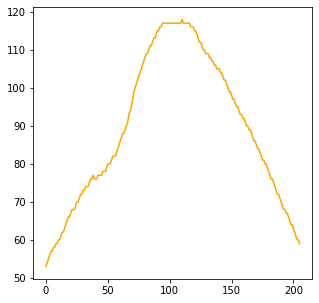

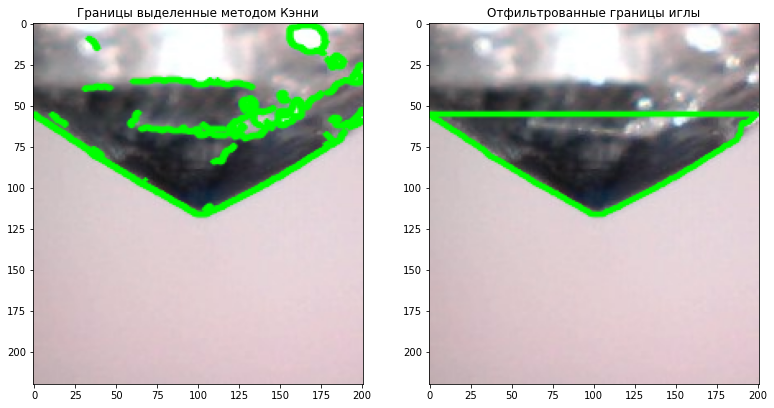

../dataset/zoom_needle_no_background/s_needle_2.jpg


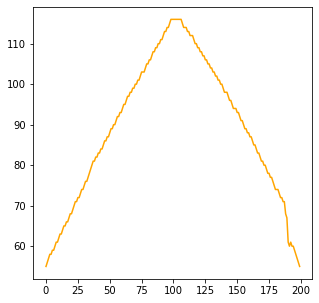

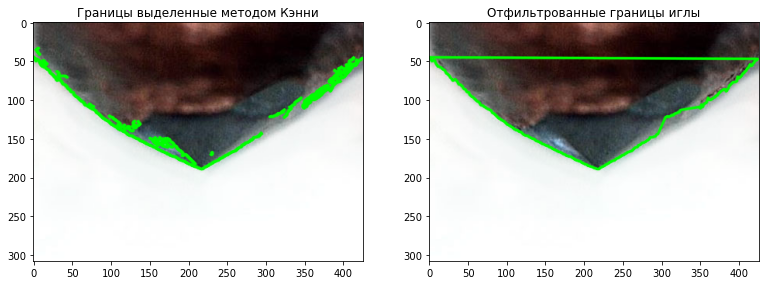

../dataset/zoom_needle_no_background/s_needle_3.jpg


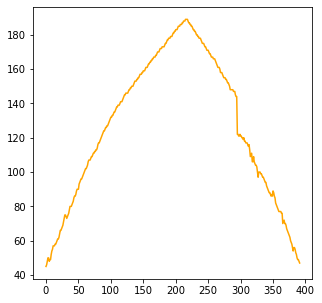

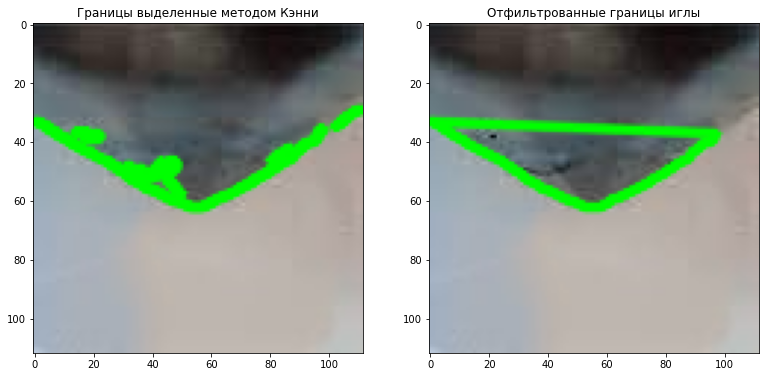

../dataset/zoom_needle_no_background/s_needle_4.jpg


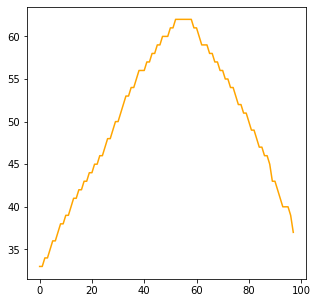

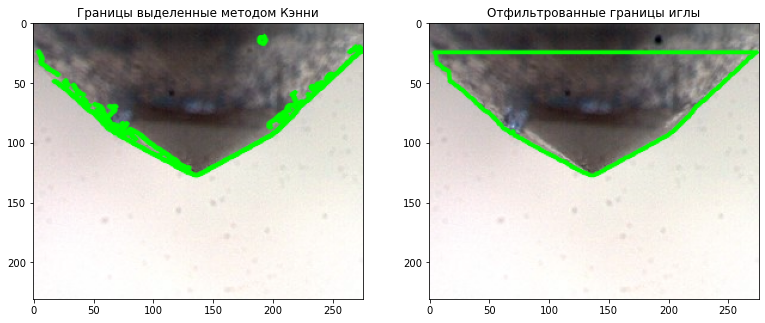

../dataset/zoom_needle_no_background/s_needle_5.jpg


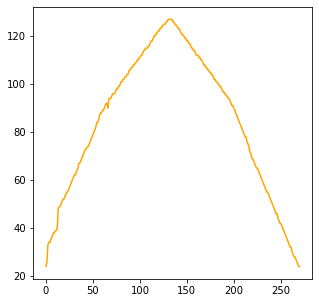

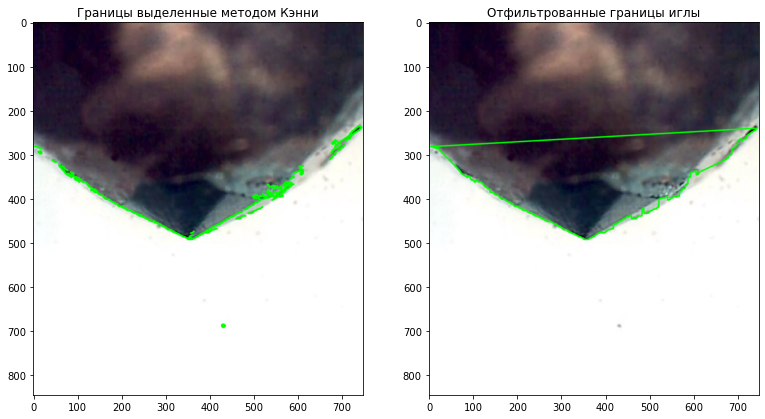

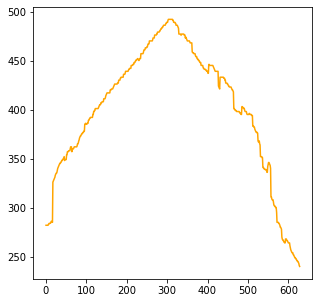

In [7]:
for path_img in list_path_img:
    path = '../dataset/'+ path_img
    print(path)
    img = cv.imread(path, 1)
    contour_canny = find_contour(img)
    conture_max_point = max_points(contour_canny)
    draw_borders(img, contour_canny, conture_max_point)
    draw_line_border(conture_max_point)
    
#     Сохранение границ в таблицы
#     df_points = pd.DataFrame(conture_max_point, columns=["x", "y"])
#     path_table = "../dataset/zoom_needle_no_background_table/" + (path_img.split('/')[1]).split('.')[0] + ".csv"
#     df_points.to_csv(path_table)